# Edge detection

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
gauss_images = pickle.load(open( "pickle_data/gauss_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20331 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

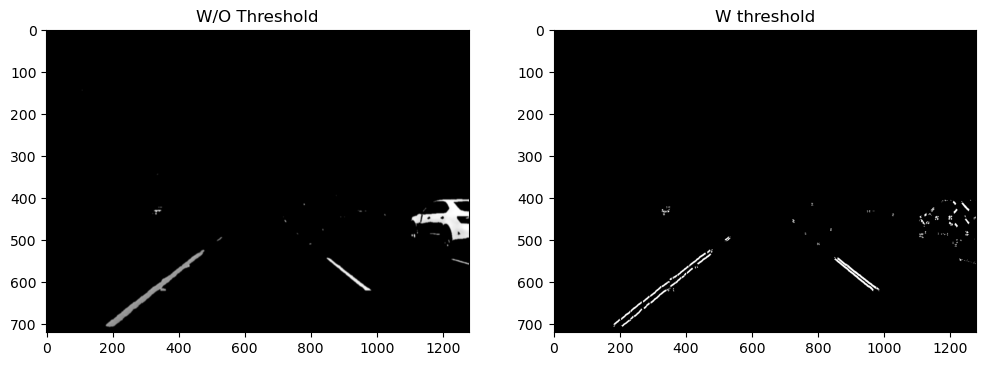

In [2]:
# Only x and y 
# sbinary = sobel_thresh(img, sobel_kernel=3, x_thresh=[10,100], y_thresh=[10,100], mag_thresh=[1,255], dir_thresh=[0,1.56])
img = gauss_images[6]

sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[40,100], mag_thresh=[50,255], dir_thresh=[100,200])



displayListImages([img,sbinary],cols=2,cmap='gray',figSize=[12,2],titles= ["W/O Threshold", "W threshold"])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

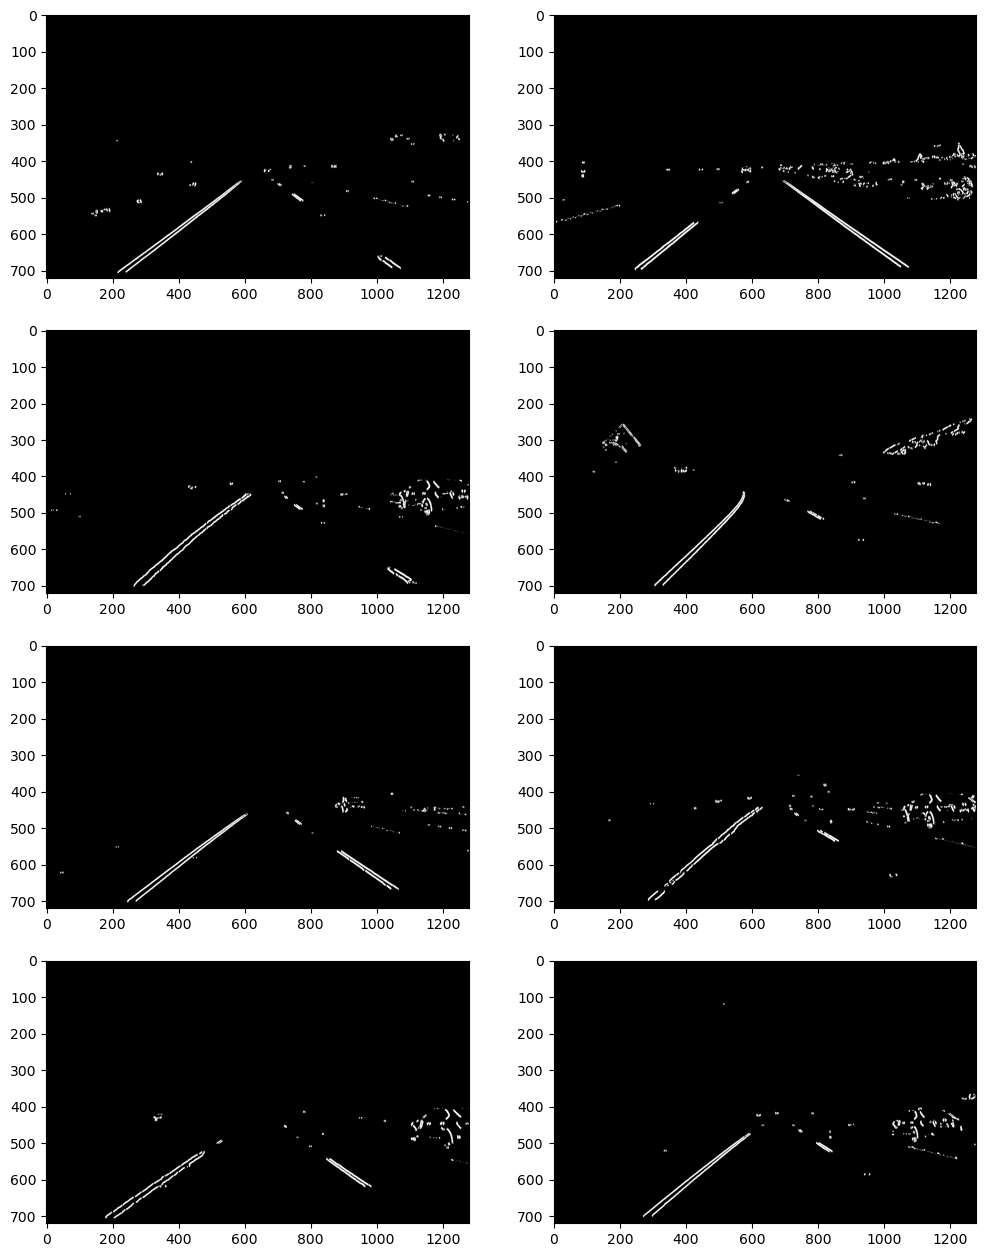

In [3]:
edge_images = []

for img in gauss_images:
    #sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[40,100], mag_thresh=[1,255], dir_thresh=[0,1.56])
    sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[80,100], mag_thresh=[50,255], dir_thresh=[0,200])
    edge_images.append(sbinary)
        
displayListImages(edge_images,cols=2,cmap='gray',figSize=[12,8])

## Dump data

In [4]:
pickle.dump( edge_images, open( "pickle_data/edge_images.p", "wb" ) )

***

## Images Report

In [5]:
path = './output_images/'


for i in range(len(edge_images)):
    write_name = 'edge_images_'+str(i)+'.jpg'
    out = np.dstack((edge_images[i]*255, edge_images[i]*255, edge_images[i]*255))
    cv2.imwrite(os.path.join(path , write_name), out)